In [1]:
#pip install NRCLex

In [2]:
#import nltk
#nltk.download('punkt')

In [3]:
from nrclex import NRCLex
import pandas as pd
import numpy as np
import os
import plotly.graph_objects as go
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

In [4]:
text_file_name = 'chapter_27.txt'
chapter_number = 'Chapter 27'

In [5]:
# function to clean the text
def remove_strange_characters(file):
    text = file.read().strip().replace('\r', ' ').replace('\n', ' ').replace('\xc3\xa9', 'e').replace("\xe2\x80\x9d", '"')
    text = text.replace("\xe2\x80\x9c", '"').replace('\xe2\x80\x94', '-').replace('\xc3\xa8', 'e').replace('\xc3\xa2', 'a')
    text = text.replace('\xe2\x80\x98', '').replace('\xc3\xb4', 'o').replace('\xc3\xa7', 'c').replace('\xc3\xaf', 'i')
    text = text.replace('\xc3\xaa', 'e').replace('\xc3\xbb', 'u').replace("\xe2\x80\x99", "'").replace('\xc3\xa0', 'a')
    text = text.replace('\xc5\x92', 'OE').replace('\xc5\x93', 'oe').replace('\xc3\xae', 'i').replace('\xc3\x80', 'A')
    text = text.replace('\xc3\xbc', 'u').replace('\xe2\x80\x93', '-').replace('\xc3\xb6', 'o').replace('\xc3\xa4', 'a')
    text = text.replace('\xc3\xb1', 'n').replace('\xc3\x89', 'E').replace('\xc3\x9c', 'U').replace('\xc2\xab', '')
    text = text.replace('\xc2\xbb', '').replace('\xc2\xa3', 'pounds ').replace('\xe2\x80\xa6', '...')
    text = text.replace('\xe2\x80\xa2', '').replace('\xc3\xab', 'e').replace('\xc3\xb9', 'u').replace('\xc3\xa1', 'a')
    text = text.replace('\xe0', '?').replace('\xe9', 'e').replace('\xea', ' ').replace('\xc2\xb0', '')
    text = text.replace('\xc3\xb3', 'o').replace('\xc3\x87', 'C')
    return text

In [6]:
def remove_punctuation(text):
    text = text.replace('.', ' ').replace(',', ' ').replace('?', ' ').replace('!', ' ')
    text = text.replace(':', ' ').replace(';', ' ').replace('-', ' ')
    text = text.replace('(', ' ').replace(')', ' ').replace('[', ' ').replace(']', ' ')
    text = text.replace('"', ' ').replace("'", " ").replace('_', ' ')
    
    return text

In [7]:
def remove_character_names(text):
    bm_character_names = ['Hugh', 'Tracy', 'Clare', 'Belmanoir', 'Grace', 'Duke', 'Andover', 'Frank', 
                          'Fortescue', 'Chadber', 'Charles', 'Edward', 'Prince', 'Charlie', 'Chequers', 
                          'Marlborough', 'James', 'Sir', 'Anthony', 'Ferndale', 'Lord', 'John', 'Carstares', 
                          'Earl', 'Wyncham', 'Jack', 'Hon', 'Richard', 'Lady', 'Lavinia', 'Master', 'Warburton', 
                          'King', 'George', 'Harry', 'Jim', 'Lewes', 'Fudby', 'Chiltern', 'Hedges', 'Welsh', 'Gundry', 
                          'Milward', 'Dare', 'Fitzgeral', 'Betty', 'Andrew', 'Lavvy', 'Dick', 'Mayfair', 'Bath', 
                          'Queen', 'Anne', 'Colonel', 'Madam', 'Thompson', 'Miss', 'Elizabeth', 'Beauleigh', 
                          'Diana', 'Di', 'Beau', 'Nash', 'Everard', 'Mistress', 'Jennifer', 'Avon', 'Catherine', 
                          'Place', 'Will', 'Stapely', 'Viscount', 'Selwyn', 'Sir', 'Gregory', 'Markham', 'Cholmondely', 
                          'Ffolliott', 'Gilly', 'Tom', 'Wilding', 'Cynthia', 'Evans', 'Falmouth', 'Dunbar', 
                          'Sussex', 'Midhurst', 'Jenny', 'Miles', 'Hara', 'Molly', 'Kilroy', 'David', 'Smith', 'Harry', 
                          'Jasper', 'Thurze', 'House', 'Trencham', 'Salter', 'Duc', 'Mademoiselle', 'Thomas', 'Miss', 
                          'Horton', 'Manor', 'Littledean', 'Carr', 'Bettison', 'Cambridge', 'Oxford', 'Fido', 
                          'Fittering', 'Mary', 'London', 'House', 'Jane', 'Egmont', 'Cavendish', 'Julian', 
                          'Selwyn', 'Kitty', 'Robert', 'Pavilion', 'Bob', 'Captain', 'Lovelace', 'Harold', 
                          'Duchess', 'Devonshire', 'March', 'Gunning', 'Isabella', 'Fanshaw', 'Fotheringham', 
                          'Fletcher', 'Dolly', 'Pompadour', 'Paris', 'Grosvenor', 'Square', 'Davenant', 'Curzon', 
                          'Edgecumbe', 'Piccadilly', 'Arlington', 'Walpole', 'Twickenham', 'Williams', 'Harper', 
                          'Grandison', 'White', 'Standish', 'Vienna', 'Ervine', 'Delaney', 'Newgate', 'Mount', 'Douglas', 
                          'Scotland', 'Drury', 'Lane', 'Fleming', 'Holt', 'Carlyle', 'Queensbury', 'Devereux', 'Garrick', 
                          'Crescent', 'Fields', 'Scrub', 'Boniface', 'Archer', 'Clive', 'Brook', 'Street', 'Harriet', 
                          'Ashley', 'Horace', 'Court', 'Spectator', 'Maltby', 'Job', 'Countess', 'Coventry']
    # loop through each character name and remove from text
    for char_name in bm_character_names:
        text = text.replace(char_name, ' ')
    return text

In [8]:
# function to 
def split_into_stings(text):
    # split the text file up into individual strings
    text = text.split(' ')
    return text

In [9]:
# function to append words in the column name passed to it, which are different to the same index word in column 'text'
#def append_different_words_in_new_column(new_col, master_df, df):
#    df_1 = df.loc[df[new_col] != df['text']]
#    df_2 = df_1[new_col].tolist()
#    df_3 = pd.DataFrame(data=df_2, columns=['text'])
    
    # append new column onto master_df
#    master_df = master_df.append(df_3, ignore_index=True)
    
#    return master_df

In [10]:
# function to remove endings of words e.g 'ed'
def remove_some_endings_of_words(text):
    # convert text to column of dataframe
    #master_df = pd.DataFrame(data=text, columns=['text'])
    df = pd.DataFrame(data=text, columns=['text'])
    # 'ed'
    df['text_ed'] = df['text'].str.replace(r'ed$', '')
    df.loc[df['text'] == df['text_ed'], 'text_ed'] = np.nan
    #master_df = append_different_words_in_new_column('text_ed', master_df, df)
    # if 'ed', just remove 'd'
    df['text_d'] = df['text'].str.replace(r'ed$', 'e')
    df.loc[df['text'] == df['text_d'], 'text_d'] = np.nan
    #master_df = append_different_words_in_new_column('text_d', master_df, df)
    # 'er'
    df['text_er'] = df['text'].str.replace(r'er$', '')
    df.loc[df['text'] == df['text_er'], 'text_er'] = np.nan
    #master_df = append_different_words_in_new_column('text_er', master_df, df)
    # 'ers'
    df['text_ers'] = df['text'].str.replace(r'ers$', '')
    df.loc[df['text'] == df['text_ers'], 'text_ers'] = np.nan
    #master_df = append_different_words_in_new_column('text_ers', master_df, df)
    # 'or'
    df['text_or'] = df['text'].str.replace(r'or$', '')
    df.loc[df['text'] == df['text_or'], 'text_or'] = np.nan
    #master_df = append_different_words_in_new_column('text_or', master_df, df)
    # 'ory'
    df['text_ory'] = df['text'].str.replace(r'ory$', '')
    df.loc[df['text'] == df['text_ory'], 'text_ory'] = np.nan
    #master_df = append_different_words_in_new_column('text_ory', master_df, df)
    # if 'ory', add e
    df['text_ory_e'] = df['text'].str.replace(r'ory$', 'e')
    df.loc[df['text'] == df['text_ory_e'], 'text_ory_e'] = np.nan
    #master_df = append_different_words_in_new_column('text_ory_e', master_df, df)
    # if 'er', just remove 'r'
    df['text_r'] = df['text'].str.replace(r'er$', 'e')
    df.loc[df['text'] == df['text_r'], 'text_r'] = np.nan
    #master_df = append_different_words_in_new_column('text_r', master_df, df)
    # 'ing'
    df['text_ing'] = df['text'].str.replace(r'ing$', '')
    df.loc[df['text'] == df['text_ing'], 'text_ing'] = np.nan
    #master_df = append_different_words_in_new_column('text_ing', master_df, df)
    # if 'ing', replace 'e'
    df['text_ing_e'] = df['text'].str.replace(r'ing$', 'e')
    df.loc[df['text'] == df['text_ing_e'], 'text_ing_e'] = np.nan
    #master_df = append_different_words_in_new_column('text_ing_e', master_df, df)
    # 'ly'
    df['text_ly'] = df['text'].str.replace(r'ly$', '')
    df.loc[df['text'] == df['text_ly'], 'text_ly'] = np.nan
    #master_df = append_different_words_in_new_column('text_ly', master_df, df)
    # 'ment'
    df['text_ment'] = df['text'].str.replace(r'ment$', '')
    df.loc[df['text'] == df['text_ment'], 'text_ment'] = np.nan
    #master_df = append_different_words_in_new_column('text_ment', master_df, df)
    # if 'ment', add 'e'
    df['text_ment_e'] = df['text'].str.replace(r'ment$', 'e')
    df.loc[df['text'] == df['text_ment_e'], 'text_ment_e'] = np.nan
    #master_df = append_different_words_in_new_column('text_ment_e', master_df, df)
    # 'tion'
    df['text_tion'] = df['text'].str.replace(r'tion$', '')
    df.loc[df['text'] == df['text_tion'], 'text_tion'] = np.nan
    #master_df = append_different_words_in_new_column('text_tion', master_df, df)
    # 'sion'
    df['text_sion'] = df['text'].str.replace(r'sion$', '')
    df.loc[df['text'] == df['text_sion'], 'text_sion'] = np.nan
    #master_df = append_different_words_in_new_column('text_sion', master_df, df)
    # 's'
    df['text_s'] = df['text'].str.replace(r's$', '')
    df.loc[df['text'] == df['text_s'], 'text_s'] = np.nan
    #master_df = append_different_words_in_new_column('text_s', master_df, df)
    # 'es'
    df['text_es'] = df['text'].str.replace(r'es$', '')
    df.loc[df['text'] == df['text_es'], 'text_es'] = np.nan
    #master_df = append_different_words_in_new_column('text_es', master_df, df)
    # if 'ies', replace with 'y'
    df['text_ies'] = df['text'].str.replace(r'ies$', 'y')
    df.loc[df['text'] == df['text_ies'], 'text_ies'] = np.nan
    #master_df = append_different_words_in_new_column('text_ies', master_df, df)
    # 'ence'
    df['text_ence'] = df['text'].str.replace(r'ence$', '')
    df.loc[df['text'] == df['text_ence'], 'text_ence'] = np.nan
    #master_df = append_different_words_in_new_column('text_ence', master_df, df)
    # 'ences'
    df['text_ences'] = df['text'].str.replace(r'ences$', '')
    df.loc[df['text'] == df['text_ences'], 'text_ences'] = np.nan
    #master_df = append_different_words_in_new_column('text_ences', master_df, df)
    # 'ial'
    df['text_ial'] = df['text'].str.replace(r'ial$', '')
    df.loc[df['text'] == df['text_ial'], 'text_ial'] = np.nan
    #master_df = append_different_words_in_new_column('text_ial', master_df, df)
    # 'ially'
    df['text_ially'] = df['text'].str.replace(r'ially$', '')
    df.loc[df['text'] == df['text_ially'], 'text_ially'] = np.nan
    #master_df = append_different_words_in_new_column('text_ially', master_df, df)
    # 'ible'
    df['text_ible'] = df['text'].str.replace(r'ible$', '')
    df.loc[df['text'] == df['text_ible'], 'text_ible'] = np.nan
    #master_df = append_different_words_in_new_column('text_ible', master_df, df)
    # 'able'
    df['text_able'] = df['text'].str.replace(r'able$', '')
    df.loc[df['text'] == df['text_able'], 'text_able'] = np.nan
    #master_df = append_different_words_in_new_column('text_able', master_df, df)
    # ibly
    df['text_ibly'] = df['text'].str.replace(r'ibly$', '')
    df.loc[df['text'] == df['text_ibly'], 'text_ibly'] = np.nan
    #master_df = append_different_words_in_new_column('text_ibly', master_df, df)
    # if 'ible', replace with 'e'
    df['text_ible_e'] = df['text'].str.replace(r'ible$', 'e')
    df.loc[df['text'] == df['text_ible_e'], 'text_ible_e'] = np.nan
    #master_df = append_different_words_in_new_column('text_ible_e', master_df, df)
    # if 'able', replace with 'e'
    df['text_able_e'] = df['text'].str.replace(r'able$', 'e')
    df.loc[df['text'] == df['text_able_e'], 'text_able_e'] = np.nan
    #master_df = append_different_words_in_new_column('text_able_e', master_df, df)
    # if 'ibly', replace with 'e'
    df['text_ibly_e'] = df['text'].str.replace(r'ibly$', 'e')
    df.loc[df['text'] == df['text_ibly_e'], 'text_ibly_e'] = np.nan
    #master_df = append_different_words_in_new_column('text_ibly_e', master_df, df)
    
    #return master_df.values.flatten().tolist()
    text = df.values.flatten().tolist()
    return [x for x in text if x == x]

In [11]:
# function to take a block of text and then rate each word for each of the 8 emotions
def emotionally_rate_words(text):
    # create an empty df
    emotions_df = pd.DataFrame(columns=['fear', 'anger', 'anticip', 'trust', 'surprise', 'positive', 'negative', 'sadness', 'disgust', 'joy', 'anticipation'])

    # Iterate through list
    for i in range(len(text)):
        # Create object
        emotion = NRCLex(text[i])

        # Classify emotion
        emotion_dict = emotion.affect_frequencies

        # convert dictionary to pandas dataframe
        temp_df = pd.DataFrame.from_dict([emotion_dict], orient='columns')
        temp_df.index = [text[i]]
        
        #print('\n')
        #print(text[i])
        #print(emotion_dict)
        
        # append to emotions_df
        emotions_df = emotions_df.append(temp_df)
        
    # cleaning the dataframe
    # set nan to 0
    emotions_df = emotions_df.fillna(value=0)
    
    # Unhelpfully there seems to be 'anticip' and 'anticipation'
    # set bigger value of 'anticip' and 'anticipation' to the value for 'anticipation'
    emotions_df['anticipation'] = emotions_df[['anticip', 'anticipation']].max(axis=1)
    
    # drop column 'anticip'
    emotions_df = emotions_df.drop(labels='anticip', axis=1)
    
    return emotions_df

In [12]:
# next a function to add up the columns and divide by the number of non-zero rows
def emotionally_rate_text(master_df):
    # first remove all rows which are all zero
    zero_words = master_df.loc[(master_df['fear'] == 0.0) & (master_df['anger'] == 0.0) & (master_df['trust'] == 0) & (master_df['surprise'] == 0.0) & (master_df['positive'] == 0.0) & (master_df['negative'] == 0.0) & (master_df['sadness'] == 0.0) & (master_df['disgust'] == 0.0) & (master_df['joy'] == 0.0) & (master_df['anticipation'] == 0.0)].index               
    df = master_df.drop(labels=zero_words, axis=0,)
    # number of non-zero words
    num_of_words = len(df)
    # finding the number of positive and negative words
    pos_words_df = df.loc[df['positive'] != 0]
    neg_words_df = df.loc[df['negative'] != 0]
    # sum each column
    sum_of_col = df.sum(axis=0)
    percent_of_emotion = (sum_of_col/num_of_words)*100.0
    
    # create a dataframe with no only positive or negative words
    no_only_pos_or_neg_words = df.loc[(df['fear'] == 0.0) & (df['anger'] == 0.0) & (df['trust'] == 0) & (df['surprise'] == 0.0) & (df['sadness'] == 0.0) & (df['disgust'] == 0.0) & (df['joy'] == 0.0) & (df['anticipation'] == 0.0)].index  
    no_only_pos_or_neg_words_df = df.drop(labels=no_only_pos_or_neg_words, axis=0)
    # because order is important
    # we need to create an index column and set the index to numbers, so the dataframe can be reassembled in the same order
    no_only_pos_or_neg_words_df = no_only_pos_or_neg_words_df.reset_index()
    # now create a dataframe with no positive or negative values
    # this is the master dataframe
    df2 = no_only_pos_or_neg_words_df.drop(labels=no_only_pos_or_neg_words_df.loc[(no_only_pos_or_neg_words_df['positive'] != 0.0) | (no_only_pos_or_neg_words_df['negative'] != 0.0)].index, axis=0)

    # then create a dataframe with words which have positive and or negative words
    words_with_pos_or_neg_df = no_only_pos_or_neg_words_df.loc[(no_only_pos_or_neg_words_df['positive'] != 0.0) | (no_only_pos_or_neg_words_df['negative'] != 0.0)]
    # next we want to loop through each word in words_with_pos_or_neg_df
    # sum the pos + neg value
    # then find all other non-zero values
    # (sum the pos + neg value) / (len(other non-zero values)) = X
    # then add X to all other non-zero values
    # then finally append this row to df2
    index_words_with_pos_or_neg = words_with_pos_or_neg_df.index
    for i in index_words_with_pos_or_neg:
        sum_of_pos_and_neg = words_with_pos_or_neg_df['positive'][i] + words_with_pos_or_neg_df['negative'][i]
        temp_df = words_with_pos_or_neg_df.drop(['index', 'positive', 'negative'], axis=1)
        len_non_zero = temp_df.loc[i:i].fillna(0).astype(bool).sum(axis=1)
        extra_for_each_emotion = sum_of_pos_and_neg/len_non_zero
        # add extra_for_each_emotion for all non-zero emotions
        if words_with_pos_or_neg_df['anger'][i] != 0.0:
            words_with_pos_or_neg_df['anger'][i] = words_with_pos_or_neg_df['anger'][i] + extra_for_each_emotion
        if words_with_pos_or_neg_df['anticipation'][i] != 0.0:
            words_with_pos_or_neg_df['anticipation'][i] = words_with_pos_or_neg_df['anticipation'][i] + extra_for_each_emotion
        if words_with_pos_or_neg_df['disgust'][i] != 0.0:
            words_with_pos_or_neg_df['disgust'][i] = words_with_pos_or_neg_df['disgust'][i] + extra_for_each_emotion
        if words_with_pos_or_neg_df['fear'][i] != 0.0:
            words_with_pos_or_neg_df['fear'][i] = words_with_pos_or_neg_df['fear'][i] + extra_for_each_emotion
        if words_with_pos_or_neg_df['joy'][i] != 0.0:
            words_with_pos_or_neg_df['joy'][i] = words_with_pos_or_neg_df['joy'][i] + extra_for_each_emotion
        if words_with_pos_or_neg_df['sadness'][i] != 0.0:
            words_with_pos_or_neg_df['sadness'][i] = words_with_pos_or_neg_df['sadness'][i] + extra_for_each_emotion
        if words_with_pos_or_neg_df['surprise'][i] != 0.0:
            words_with_pos_or_neg_df['surprise'][i] = words_with_pos_or_neg_df['surprise'][i] + extra_for_each_emotion
        if words_with_pos_or_neg_df['trust'][i] != 0.0:
            words_with_pos_or_neg_df['trust'][i] = words_with_pos_or_neg_df['trust'][i] + extra_for_each_emotion

    df2 = df2.append(words_with_pos_or_neg_df, ignore_index=False)
    df2= df2.sort_index()
    # then set column 'index' as index
    df2 = df2.set_index('index')
    # drop positive and negative columns
    df2 = df2.drop(labels=['positive', 'negative'] , axis=1)
    
    ## next remove the positive and negative columns
    #df2 = df.drop(labels=['positive', 'negative'] , axis=1)
    #no_only_pos_or_neg_words = df2.loc[(df2['fear'] == 0.0) & (df2['anger'] == 0.0) & (df2['trust'] == 0) & (df2['surprise'] == 0.0) & (df2['sadness'] == 0.0) & (df2['disgust'] == 0.0) & (df2['joy'] == 0.0) & (df2['anticipation'] == 0.0)].index  
    #df2 = df2.drop(labels=no_only_pos_or_neg_words, axis=0)
    num_of_words2 = len(df2)
    sum_of_col2 = df2.sum(axis=0)
    percent_of_emotion2 = (sum_of_col2/num_of_words2)*100.0
    
    return percent_of_emotion, percent_of_emotion2, df, df2, zero_words, pos_words_df, neg_words_df

In [13]:
# function to create a lagged column
def add_lags(df, column, lags):
    cols = [column]
    new_columns = []
    for lag in range(1, lags+1):
        col = '%s_lag_%d' % (column, lag)
        df[col] = df[column].shift(lag)
        cols.append(col)
        new_columns.append(col)
    return df, cols, new_columns

In [14]:
# read in raw text file
base=os.path.basename(text_file_name)
name = os.path.splitext(base)[0]
file = open(text_file_name, 'r')

In [15]:
# remove non ascii characters
text = remove_strange_characters(file)

In [16]:
# remove punctuation 
text = remove_punctuation(text)

### Character names and place names<br>
Hugh<br>
Tracy<br>
Clare<br>
Belmanoir<br>
Grace<br>
Duke<br>
Andover<br>
Frank<br>
Fortescue<br>
Chadber<br>
Charles<br>
Edward<br>
Prince<br>
Charlie<br>
Chequers<br>
Marlborough<br>
James<br>
Sir<br>
Anthony<br>
Ferndale<br>
Lord<br>
John<br>
Carstares<br>
Earl<br>
Wyncham<br>
Jack<br>
Hon<br>
Richard<br>
Lady<br>
Lavinia<br>
Dick<br>
Master<br>
Warburton<br>
King<br>
George<br>
Harry<br>
Jim<br>
Lewes<br>
Fudby<br>
Chiltern<br>
Hedges<br>
Welsh<br>
Gundry<br>
Milward<br>
Dare<br>
Fitzgeral<br>
Betty<br>
Andrew<br>
Lavvy<br>
Mayfair<br>
Bath<br>
Queen<br>
Anne<br>
Colonel<br>
Madam<br>
Thompson<br>
Miss<br>
Elizabeth<br>
Beauleigh<br>
Diana<br>
Di<br>
Beau<br>
Nash<br>
Everard<br>
Mistress<br>
Jennifer<br>
Avon<br>
Catherine<br>
Place<br>
Will<br>
Stapely<br>
Viscount<br>
Selwyn<br>
Sir<br>
Gregory<br>
Markham<br>
Cholmondely<br>
Ffolliott<br>
Gilly<br>
Tom<br>
Wilding<br>
Cynthia<br>
Evans<br>
Falmouth<br>
Dunbar<br>
Sussex<br>
Midhurst<br>
Jenny<br>
Miles<br>
Hara<br>
Molly<br>
Kilroy<br>
David<br>
Smith<br>
Harry<br>
Jasper<br>
Thurze<br>
House<br>
Trencham<br>
Salter<br>
Duc<br>
Mademoiselle<br>
Thomas<br>
Miss<br>
Horton<br>
Manor<br>
Littledean<br>
Carr<br>
Bettison<br>
Cambridge<br>
Oxford<br>
Fido<br>
Fittering<br>
Mary<br>
London<br>
House<br>
Jane<br>
Egmont<br>
Cavendish<br>
Julian<br>
Selwyn<by>
Kitty<br>
Robert<br>
Pavilion<br>
Bob<br>
Captain<br>
Lovelace<br>
Harold<br>
Duchess<br>
Devonshire<br>
March<br>
Gunning<br>
Isabella<br>
Fanshaw<br>
Fotheringham<br>
Fletcher<br>
Dolly<br>
Pompadour<br>
Paris<br>
Grosvenor<br>
Square<br>
Davenant<br>
Curzon<br>
Edgecumbe<br>
Piccadilly<br>
Arlington<br>
Walpole<br>
Twickenham<br>
Williams<br>
Harper<br>
Grandison<br>
White<br>
Standish<br>
Vienna<br>
Ervine<br>
Delaney<br>
Newgate<br>
Mount<br>
Douglas<br>
Scotland<br>
Drury<br>
Lane<br>
Fleming<br>
Holt<br>
Carlyle<br>
Queensbury<br>
Devereux<br>
Garrick<br>
Crescent<br>
Fields<br>
Scrub<br>
Boniface<br>
Archer<br>
Clive<br>
Brook<br>
Street<br>
Harriet<br>
Ashley<br>
Horace<br>
Court<br>
Spectator<br>
Maltby<br>
Job<br>
Countess<br>
Coventry<br>

In [17]:
text = remove_character_names(text)

In [18]:
text = split_into_stings(text)
print('No new non-ascii characters in the text!')

No new non-ascii characters in the text!


In [19]:
# make all letters lower case
text = [word.lower() for word in text]

In [20]:
# remove the empty strings
text = list(filter(None, text))

In [21]:
original_text_len = len(text)

In [22]:
text = remove_some_endings_of_words(text)


In [23]:
master_df = emotionally_rate_words(text)
master_df.head(15)

/Users/helendavidge/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


anger  anticipation  disgust  fear  joy  negative  positive  sadness  \
chapter    0.0           0.0     0.00   0.0  0.0      0.00      0.00      0.0   
chapt      0.0           0.0     0.00   0.0  0.0      0.00      0.00      0.0   
chapte     0.0           0.0     0.00   0.0  0.0      0.00      0.00      0.0   
xxvii      0.0           0.0     0.00   0.0  0.0      0.00      0.00      0.0   
my         0.0           0.0     0.00   0.0  0.0      0.00      0.00      0.0   
lord       0.0           0.0     0.25   0.0  0.0      0.25      0.25      0.0   
enters     0.0           0.0     0.00   0.0  0.0      0.00      0.00      0.0   
ent        0.0           0.0     0.00   0.0  0.0      0.00      0.00      0.0   
enter      0.0           0.0     0.00   0.0  0.0      0.00      0.00      0.0   
by         0.0           0.0     0.00   0.0  0.0      0.00      0.00      0.0   
the        0.0           0.0     0.00   0.0  0.0      0.00      0.00      0.0   
window     0.0           0.0     0.00   0.0  0.0      0.00      0.00      0.0   
his        0.0           0.0     0.00   0.0  0.0      0.00      0.00      0.0   
hi         0.0           0.0     0.00   0.0  0.0      0.00      0.00      0.0   
of         0.0           0.0     0.00   0.0  0.0      0.00      0.00      0.0   

         surprise  trust  
chapter       0.0   0.00  
chapt         0.0   0.00  
chapte        0.0   0.00  
xxvii         0.0   0.00  
my            0.0   0.00  
lord          0.0   0.25  
enters        0.0   0.00  
ent           0.0   0.00  
enter         0.0   0.00  
by            0.0   0.00  
the           0.0   0.00  
window        0.0   0.00  
his           0.0   0.00  
hi            0.0   0.00  
of            0.0   0.00

In [24]:
percent_of_emotion, percent_of_emotion_no_pos_no_neg, non_zero_words_df, non_zero_words_no_pos_neg, zero_words, pos_words_df, neg_words_df = emotionally_rate_text(master_df)
print(chapter_number)
print('Original number of words in the text: %d' % original_text_len)
print('Number of words used from text: %d' % len(non_zero_words_df))
print('Percentage of words used: %.2f%%' % ((len(non_zero_words_df)/original_text_len)*100.0))
print('\n')
print('Total number of positive words: %d' % len(pos_words_df))
print('Percentage of positive words from whole text: %.2f%%' % ((len(pos_words_df)/original_text_len)*100.0))
print('Percentage of positive words from words with an emotion: %.2f%%' % ((len(pos_words_df)/len(non_zero_words_df))*100.0))
print('Total number of negative words: %d' % len(neg_words_df))
print('Percentage of negative words from whole text: %.2f%%' % ((len(neg_words_df)/original_text_len)*100.0))
print('Percentage of negative words from words with an emotion: %.2f%%' % ((len(neg_words_df)/len(non_zero_words_df))*100.0))
print('\n')
print('Emotions as percentage for %s' % chapter_number)
print(percent_of_emotion)
print('\n')
print('Percentage of words used, excluding exclusively positive and negative words: %.2f%%' % ((len(non_zero_words_no_pos_neg)/original_text_len)*100.0))
print('Emotions as percentage for %s, excluding exclusively positive and negative words' % chapter_number)
print(percent_of_emotion_no_pos_no_neg)


/Users/helendavidge/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/helendavidge/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/helendavidge/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

Chapter 27
Original number of words in the text: 2336
Number of words used from text: 381
Percentage of words used: 16.31%


Total number of positive words: 166
Percentage of positive words from whole text: 7.11%
Percentage of positive words from words with an emotion: 43.57%
Total number of negative words: 161
Percentage of negative words from whole text: 6.89%
Percentage of negative words from words with an emotion: 42.26%


Emotions as percentage for Chapter 27
anger            5.348081
anticipation     9.696288
disgust          3.156480
fear             7.832771
joy              4.720035
negative        19.543182
positive        23.595801
sadness          8.029621
surprise         9.263217
trust            8.814523
dtype: float64


Percentage of words used, excluding exclusively positive and negative words: 12.76%
Emotions as percentage for Chapter 27, excluding exclusively positive and negative words
anger            9.759508
anticipation    14.289709
disgust          6.403803
fea

In [25]:
non_zero_words_df.head()

anger  anticipation  disgust  fear  joy  negative  positive  \
lord        0.0           0.0     0.25   0.0  0.0  0.250000      0.25   
watch       0.0           0.5     0.00   0.5  0.0  0.000000      0.00   
leave       0.0           0.0     0.00   0.0  0.0  0.333333      0.00   
discreet    0.0           0.5     0.00   0.0  0.0  0.000000      0.50   
eat         0.0           0.0     0.00   0.0  0.0  0.000000      1.00   

           sadness  surprise  trust  
lord      0.000000  0.000000   0.25  
watch     0.000000  0.000000   0.00  
leave     0.333333  0.333333   0.00  
discreet  0.000000  0.000000   0.00  
eat       0.000000  0.000000   0.00

In [26]:
non_zero_words_no_pos_neg.head(5)

anger  anticipation  disgust  fear  joy  sadness  surprise  trust
index                                                                      
lord        0.0           0.0      0.5   0.0  0.0      0.0       0.0    0.5
watch       0.0           0.5      0.0   0.5  0.0      0.0       0.0    0.0
leave       0.0           0.0      0.0   0.0  0.0      0.5       0.5    0.0
discreet    0.0           1.0      0.0   0.0  0.0      0.0       0.0    0.0
watch       0.0           0.5      0.0   0.5  0.0      0.0       0.0    0.0

In [27]:
len(non_zero_words_no_pos_neg)

298

In [28]:
# save non_zero_words_no_pos_neg as a dataframe
# make a copy
df_to_save = non_zero_words_no_pos_neg.copy(deep=True)
# set index as a column
df_to_save = df_to_save.reset_index()
df_to_save = df_to_save.rename(columns={'index': 'word'})
# then create a count column
df_to_save = df_to_save.reset_index()
# save dataframe as csv
csv_name = str(name + '_non_zero_words_no_pos_neg.csv')
#df_to_save.to_csv(csv_name, index=False)

### Create a moving window function to show how the emotions evolve throughout the chapter

In [29]:
if (text_file_name == 'prologue.txt') or (text_file_name == 'epilogue.txt'):
    window_size = 10
elif text_file_name == 'chapter_1.txt':
    window_size = 50
elif (text_file_name == 'diana_chapter_14.txt') or (text_file_name == 'jack_chapter_14.txt') or (text_file_name == 'lavinia_chapter_5.txt') or (text_file_name == 'lavinia_chapter_19.txt') or (text_file_name == 'lavinia_chapter_22.txt') or (text_file_name == 'lavinia_chapter_24.txt') or (text_file_name == 'richard_chapter_5.txt') or (text_file_name == 'richard_chapter_19.txt') or (text_file_name == 'richard_chapter_22.txt') or (text_file_name == 'richard_chapter_24.txt'):
    window_size = 5
elif (text_file_name == 'lavinia_chapter_4.txt') or (text_file_name == 'richard_chapter_4.txt'):
    window_size = 10
else:
    window_size = 50
    
rolling_mean_df = non_zero_words_no_pos_neg.rolling(window=window_size, min_periods=None).mean()

In [30]:
# convert index to column, and reset index
rolling_mean_df = rolling_mean_df.reset_index()

In [31]:
# create lagged index columns
rolling_mean_df, cols, new_columns= add_lags(rolling_mean_df, 'index', window_size-1)

In [32]:
# now load all the words for the window into a new column called 'words'
# add the first word to the words column
rolling_mean_df['words'] = rolling_mean_df['index']
for i in range(1, window_size-1):
    # append each word to the words column
    rolling_mean_df['words'] = rolling_mean_df['words'] + ' '+ rolling_mean_df[cols[i]]

In [33]:
#temp2[['index', 'words']].head(11)

In [34]:
# remove the top window_size-1 rows, reset index and remove unwanted columns
rolling_mean_df = rolling_mean_df.iloc[window_size-1:]
rolling_mean_df = rolling_mean_df.reset_index(drop=True)
rolling_mean_df = rolling_mean_df.drop(labels=cols, axis=1)
rolling_mean_df.head()

anger  anticipation   disgust      fear       joy  sadness  surprise  \
0  0.087333      0.190667  0.052333  0.111333  0.172333    0.119  0.059667   
1  0.087333      0.190667  0.042333  0.111333  0.172333    0.119  0.079667   
2  0.087333      0.185667  0.042333  0.101333  0.177333    0.119  0.084667   
3  0.097333      0.185667  0.042333  0.111333  0.177333    0.109  0.074667   
4  0.097333      0.165667  0.042333  0.111333  0.177333    0.109  0.074667   

      trust                                              words  
0  0.207333  love shiver god misery scorn love shudder love...  
1  0.197333  differently love shiver god misery scorn love ...  
2  0.202333  pleasant differently love shiver god misery sc...  
3  0.202333  armed pleasant differently love shiver god mis...  
4  0.222333  swear armed pleasant differently love shiver g...

In [35]:
# plot this
title = str('Evolution of Emotions throughout ' + chapter_number + ' of The Black Moth')
save_path = str('emotions_evolution_of_' + chapter_number + '.html')
title = title
num_to_add = int(window_size/2)
fig = go.Figure()
fig.update_layout(plot_bgcolor='white')
fig.update_xaxes(showline=True, showgrid=True, gridcolor='black', linecolor='black')
fig.update_yaxes(showline=True, showgrid=True, gridcolor='black', linecolor='black', zeroline=True, zerolinecolor='black')
fig.update_layout(xaxis_title='Word', yaxis_title='Rolling average', font={'size': 20}, title=title)
fig.add_trace(go.Scattergl(x=rolling_mean_df.index+(window_size/2), y=rolling_mean_df['anger'], mode='lines', marker={'color': 'red', 'symbol': 'circle'}, name='Anger', showlegend=True))
fig.add_trace(go.Scattergl(x=rolling_mean_df.index+(window_size/2), y=rolling_mean_df['trust'], mode='lines', marker={'color': 'brown', 'symbol': 'circle'}, name='Trust', showlegend=True))
fig.add_trace(go.Scattergl(x=rolling_mean_df.index+(window_size/2), y=rolling_mean_df['surprise'], mode='lines', marker={'color': 'orange', 'symbol': 'circle'}, name='Surprise', showlegend=True))
fig.add_trace(go.Scattergl(x=rolling_mean_df.index+(window_size/2), y=rolling_mean_df['joy'], mode='lines', marker={'color': 'yellow', 'symbol': 'circle'}, name='Joy', showlegend=True))
fig.add_trace(go.Scattergl(x=rolling_mean_df.index+(window_size/2), y=rolling_mean_df['disgust'], mode='lines', marker={'color': 'green', 'symbol': 'circle'}, name='Disgust', showlegend=True))
fig.add_trace(go.Scattergl(x=rolling_mean_df.index+(window_size/2), y=rolling_mean_df['sadness'], mode='lines', marker={'color': 'blue', 'symbol': 'circle'}, name='Sadness', showlegend=True))
fig.add_trace(go.Scattergl(x=rolling_mean_df.index+(window_size/2), y=rolling_mean_df['fear'], mode='lines', marker={'color': 'purple', 'symbol': 'circle'}, name='Fear', showlegend=True))
fig.add_trace(go.Scattergl(x=rolling_mean_df.index+(window_size/2), y=rolling_mean_df['anticipation'], mode='lines', marker={'color': 'pink', 'symbol': 'circle'}, name='Anticipation', showlegend=True))
fig.update_layout(yaxis_range=[0, 1])
fig.show()
#fig.write_html(save_path)

In [36]:
# now plot the evolving emotions using cubic interpolation
# first find the cubic interpolation for each emotion
anger_interp = interp1d(rolling_mean_df.index, rolling_mean_df['anger'], kind='cubic', fill_value="extrapolate")
trust_interp = interp1d(rolling_mean_df.index, rolling_mean_df['trust'], kind='cubic', fill_value="extrapolate")
surprise_interp = interp1d(rolling_mean_df.index, rolling_mean_df['surprise'], kind='cubic', fill_value="extrapolate")
joy_interp = interp1d(rolling_mean_df.index, rolling_mean_df['joy'], kind='cubic', fill_value="extrapolate")
disgust_interp = interp1d(rolling_mean_df.index, rolling_mean_df['disgust'], kind='cubic', fill_value="extrapolate")
sadness_interp = interp1d(rolling_mean_df.index, rolling_mean_df['sadness'], kind='cubic', fill_value="extrapolate")
fear_interp = interp1d(rolling_mean_df.index, rolling_mean_df['fear'], kind='cubic', fill_value="extrapolate")
anticipation_interp = interp1d(rolling_mean_df.index, rolling_mean_df['anticipation'], kind='cubic', fill_value="extrapolate")

In [37]:
min_x = 0
max_x = len(rolling_mean_df)
x_axis = np.arange(1, max_x*10)/10.0
x_axis_plus_25 = x_axis+(window_size/2)

In [38]:
len(x_axis)

2489

In [39]:
# next plot these values
# plot this
title = str('Evolution of Emotions throughout ' + chapter_number + ' of The Black Moth')
save_path = str('interpolation_emotions_evolution_of_' + chapter_number + '.html')
title = title
fig = go.Figure()
fig.update_layout(plot_bgcolor='white')
fig.update_xaxes(showline=True, showgrid=True, gridcolor='black', linecolor='black')
fig.update_yaxes(showline=True, showgrid=True, gridcolor='black', linecolor='black', zeroline=True, zerolinecolor='black')
fig.update_layout(xaxis_title='Word', yaxis_title='Rolling average', font={'size': 20}, title=title)
fig.add_trace(go.Scattergl(x=x_axis_plus_25, y=anger_interp(x_axis), mode='lines', marker={'color': 'red', 'symbol': 'circle'}, name='Anger', showlegend=True))
fig.add_trace(go.Scattergl(x=x_axis_plus_25, y=trust_interp(x_axis), mode='lines', marker={'color': 'brown', 'symbol': 'circle'}, name='Trust', showlegend=True))
fig.add_trace(go.Scattergl(x=x_axis_plus_25, y=surprise_interp(x_axis), mode='lines', marker={'color': 'orange', 'symbol': 'circle'}, name='Surprise', showlegend=True))
fig.add_trace(go.Scattergl(x=x_axis_plus_25, y=joy_interp(x_axis), mode='lines', marker={'color': 'yellow', 'symbol': 'circle'}, name='Joy', showlegend=True))
fig.add_trace(go.Scattergl(x=x_axis_plus_25, y=disgust_interp(x_axis), mode='lines', marker={'color': 'green', 'symbol': 'circle'}, name='Disgust', showlegend=True))
fig.add_trace(go.Scattergl(x=x_axis_plus_25, y=sadness_interp(x_axis), mode='lines', marker={'color': 'blue', 'symbol': 'circle'}, name='Sadness', showlegend=True))
fig.add_trace(go.Scattergl(x=x_axis_plus_25, y=fear_interp(x_axis), mode='lines', marker={'color': 'purple', 'symbol': 'circle'}, name='Fear', showlegend=True))
fig.add_trace(go.Scattergl(x=x_axis_plus_25, y=anticipation_interp(x_axis), mode='lines', marker={'color': 'pink', 'symbol': 'circle'}, name='Anticipation', showlegend=True))
fig.update_layout(yaxis_range=[0, 1])
fig.show()
#fig.write_html(save_path)

/Users/helendavidge/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



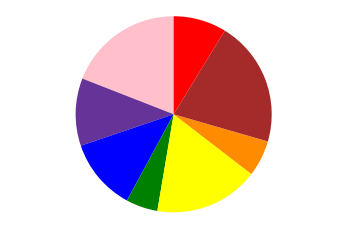

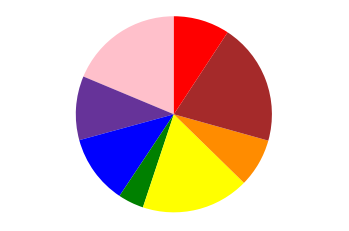

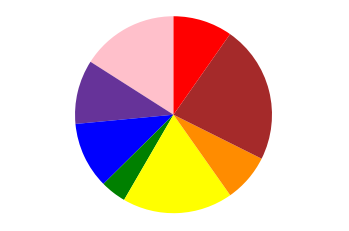

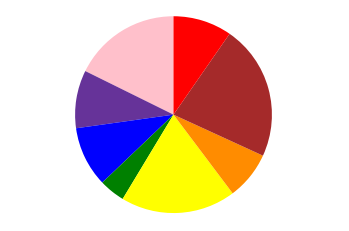

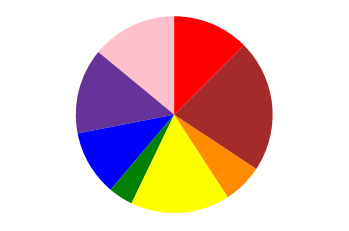

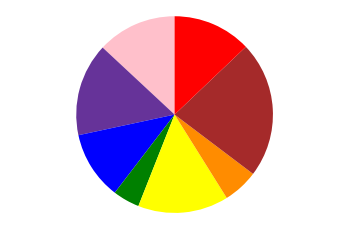

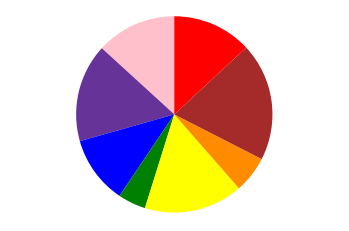

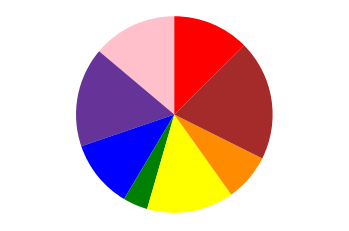

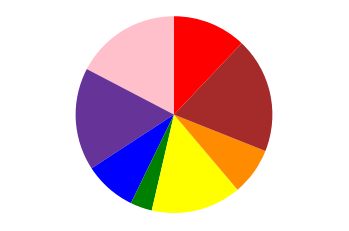

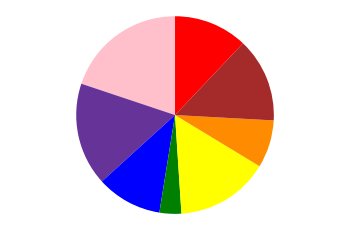

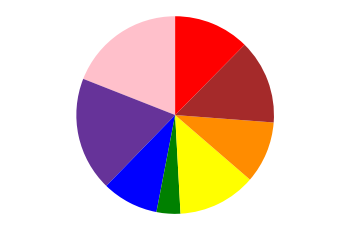

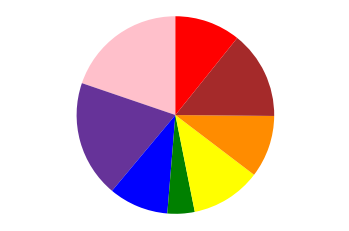

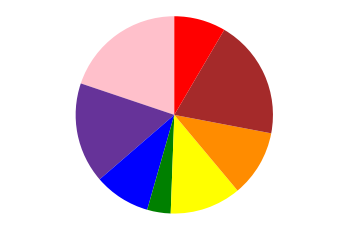

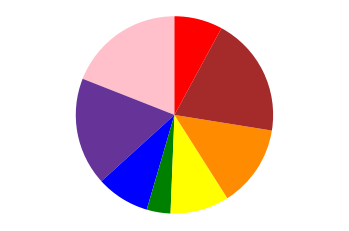

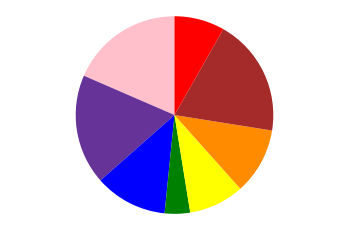

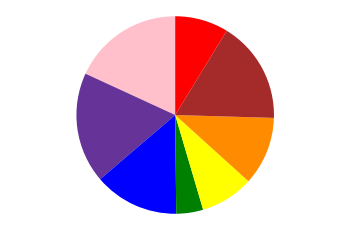

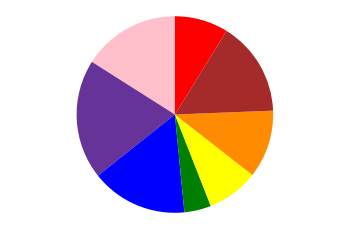

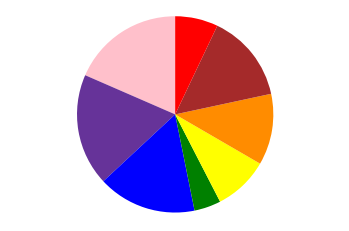

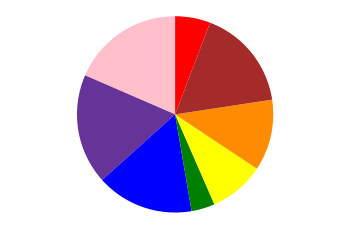

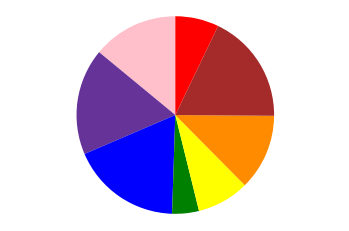

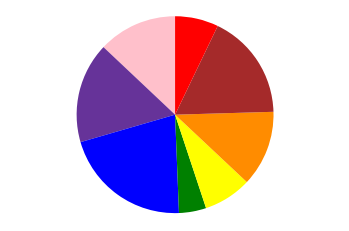

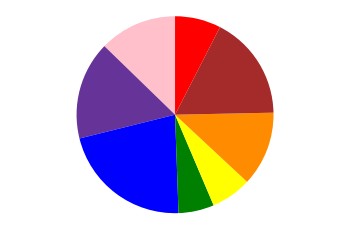

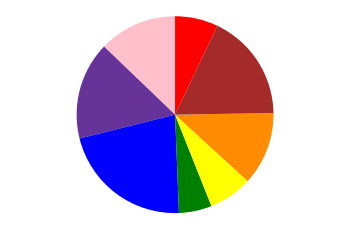

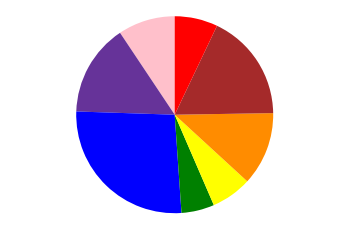

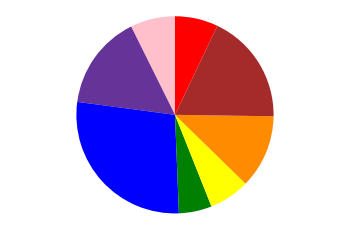

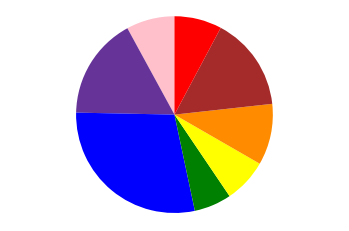

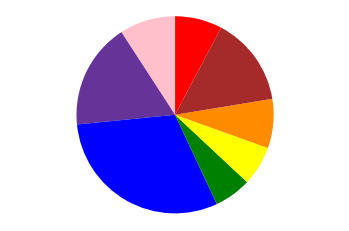

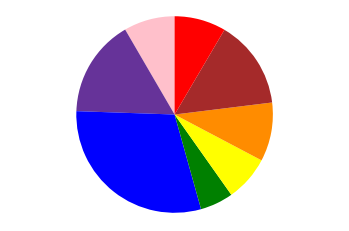

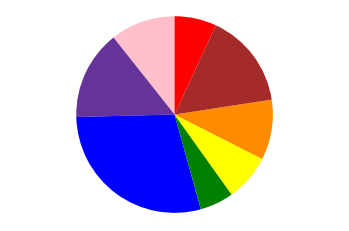

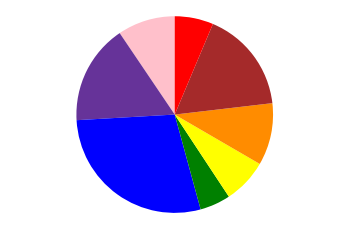

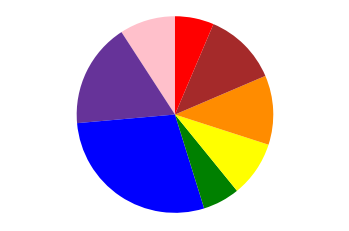

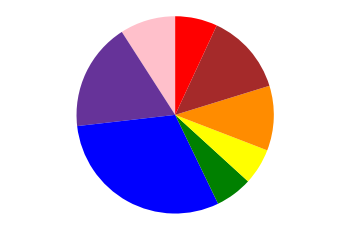

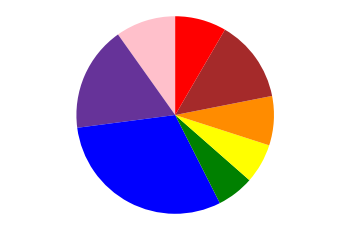

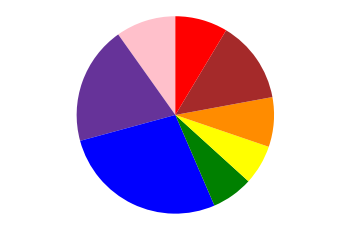

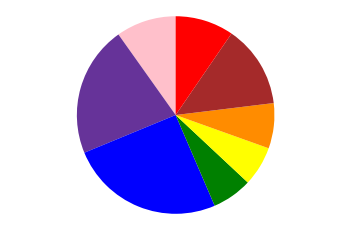

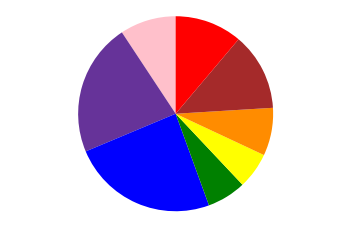

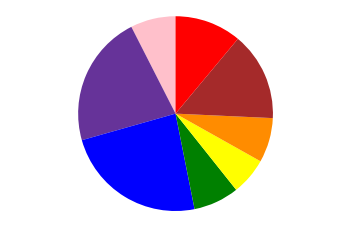

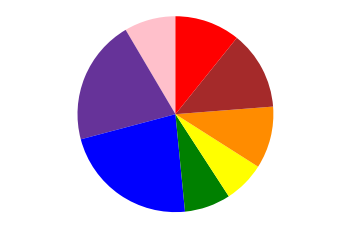

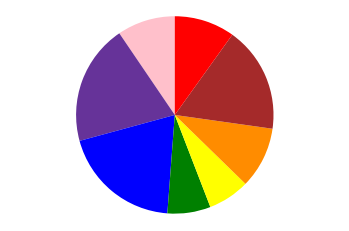

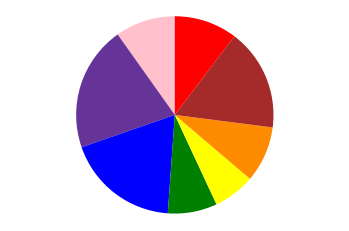

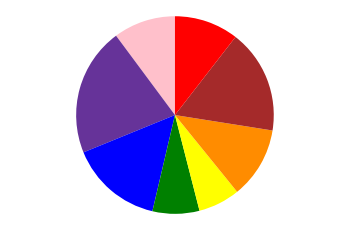

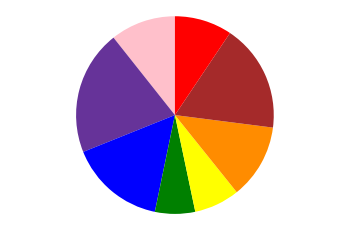

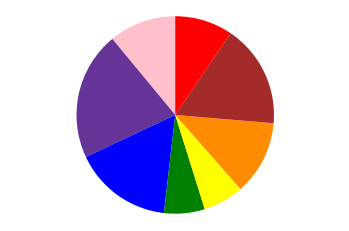

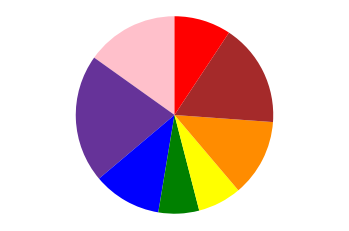

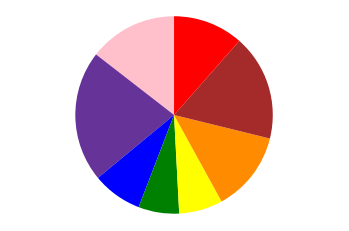

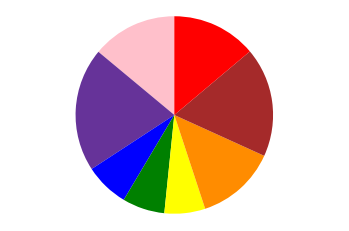

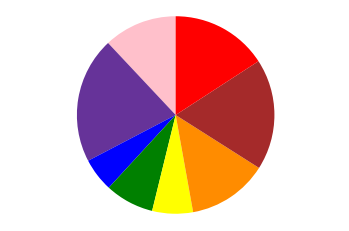

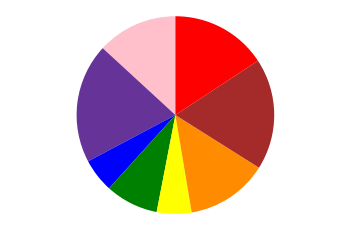

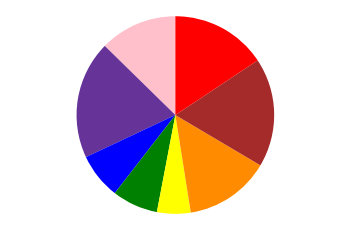

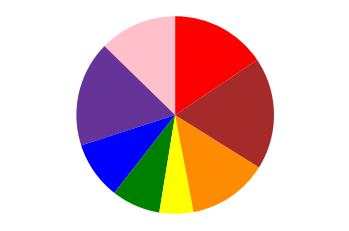

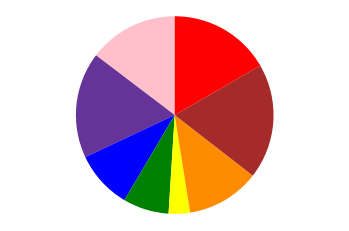

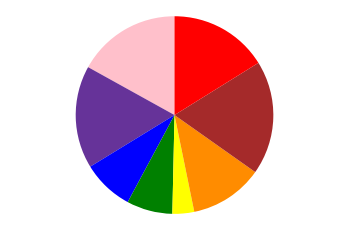

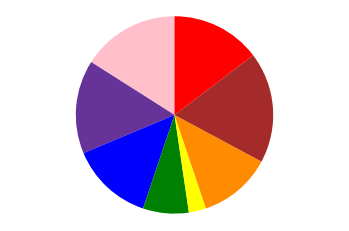

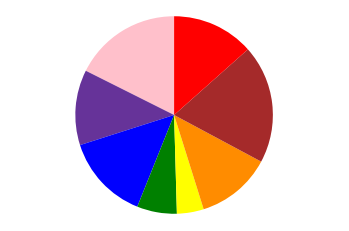

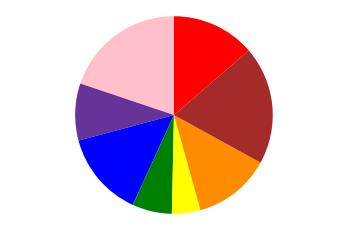

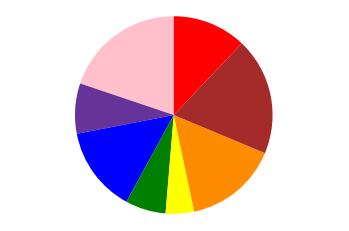

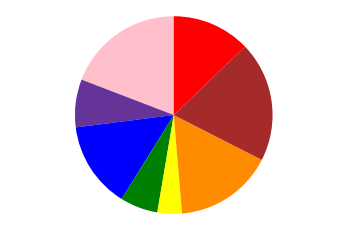

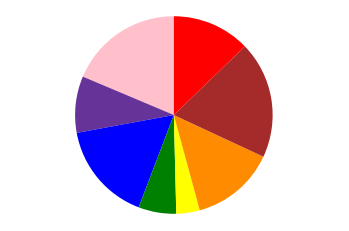

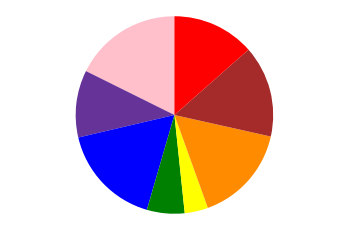

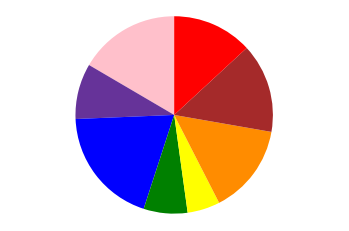

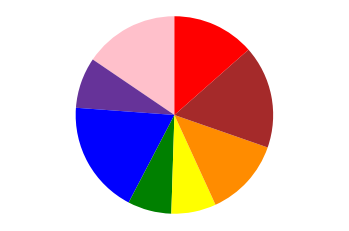

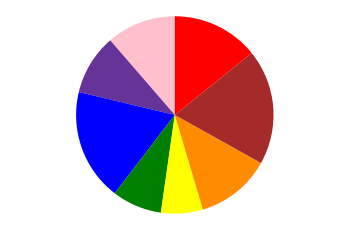

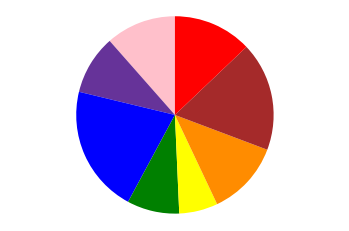

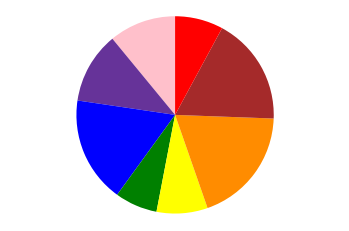

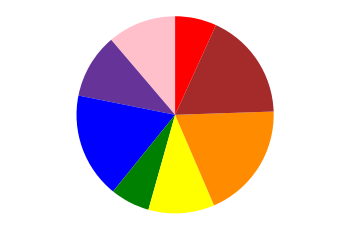

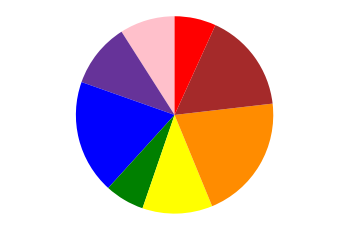

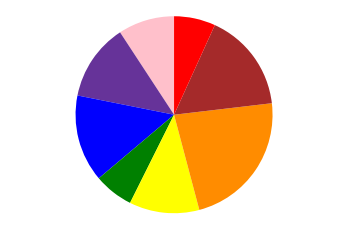

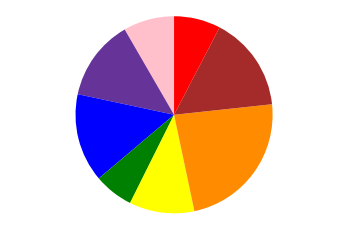

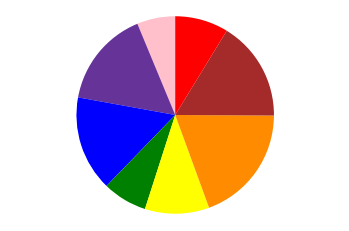

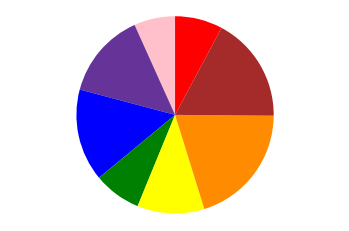

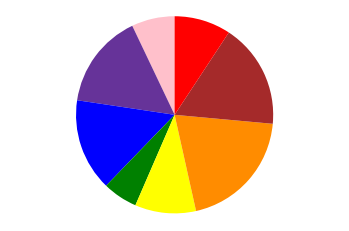

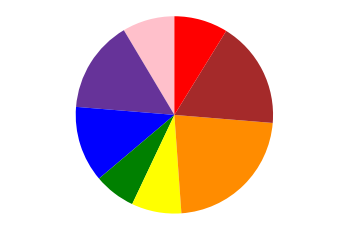

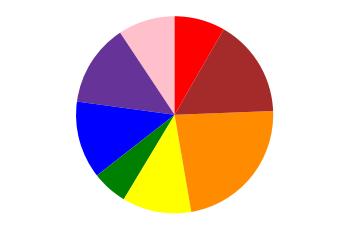

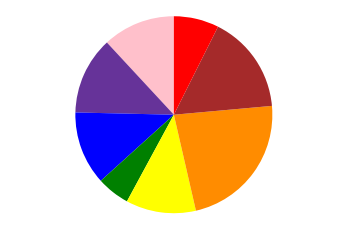

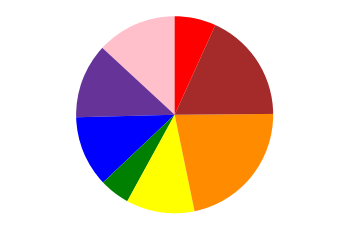

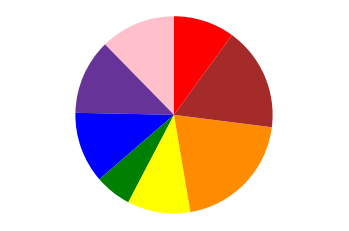

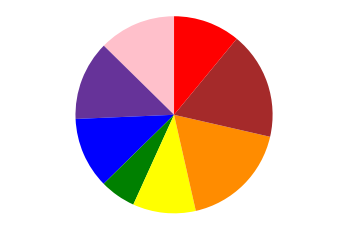

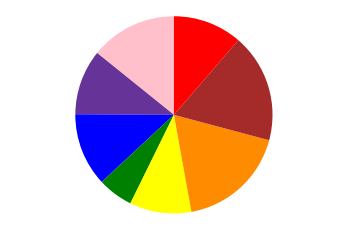

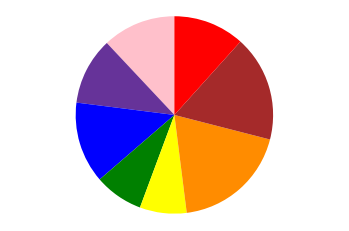

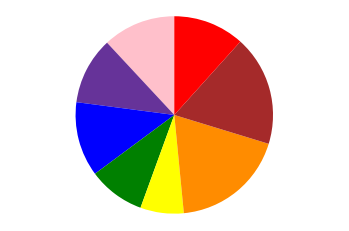

In [69]:
# create the pie charts for chapter 27
if text_file_name == 'chapter_27.txt':
    x_axis2 = np.arange(0, 100)*2.5
    anger_np = anger_interp(x_axis2)
    trust_np = trust_interp(x_axis2)
    surprise_np = surprise_interp(x_axis2)
    joy_np = joy_interp(x_axis2)
    disgust_np = disgust_interp(x_axis2)
    sadness_np = sadness_interp(x_axis2)
    fear_np = fear_interp(x_axis2)
    anticipation_np = anticipation_interp(x_axis2)
    # now loop through each number and plot the emotions as a pie chart
    for i in range(0, 100):
        plt.figure()
        sizes = [anticipation_np[i], fear_np[i], sadness_np[i], disgust_np[i], joy_np[i], surprise_np[i], trust_np[i], anger_np[i]]
        colors = ['pink', 'rebeccapurple', 'blue', 'green', 'yellow', 'darkorange', 'brown', 'red']#'darkviolet']
        patches, texts = plt.pie(sizes, startangle=90, colors=colors)#autopct='%.0f%%', )#shadow=True, , autotexts
        #plt.legend(patches, labels, loc="upper left", fontsize='x-large')
        plt.axis('equal')
        #plt.show()
        save_str = str('piechart_chapter_27_' + str(i) + '.png')
        plt.savefig(save_str)